In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:

X_test.shape

(10000, 32, 32, 3)

In [5]:

y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test.shape

(10000, 1)

In [9]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

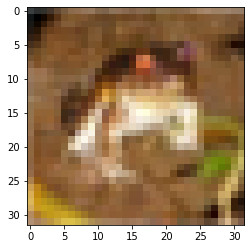

In [10]:
plt.imshow(X_train[0])

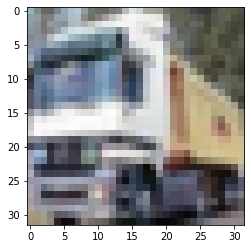

In [11]:
plt.imshow(X_train[1])

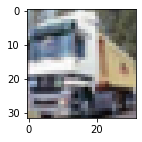

In [12]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
classes[9]

'truck'

In [15]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

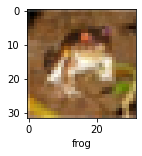

In [16]:
plot_sample(X_train, y_train, 0)

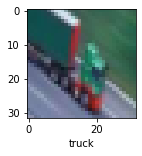

In [17]:
plot_sample(X_train, y_train, 50)

In [18]:
#Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255
X_train = X_train / 255.0
X_test = X_test / 255.0


In [19]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 110s 68ms/step - loss: 1.8104 - accuracy: 0.3539
Epoch 2/5
1563/1563 [==============================] - 121s 77ms/step - loss: 1.6212 - accuracy: 0.4273
Epoch 3/5
1563/1563 [==============================] - 112s 72ms/step - loss: 1.5407 - accuracy: 0.4577
Epoch 4/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4808 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.4337 - accuracy: 0.4958


In [21]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 1.4671 - accuracy: 0.4815


[1.4671282768249512, 0.4814999997615814]

In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 13ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.49      0.54      1000
           1       0.63      0.55      0.59      1000
           2       0.36      0.35      0.36      1000
           3       0.36      0.35      0.36      1000
           4       0.43      0.35      0.39      1000
           5       0.47      0.27      0.34      1000
           6       0.45      0.65      0.53      1000
           7       0.42      0.70      0.53      1000
           8       0.58      0.63      0.60      1000
           9       0.61      0.46      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000



In [26]:
cnn = models.Sequential([
    
        #cnn
    
        layers.Conv2D(filters=32,kernel_size=(3, 3),activation='relu',input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
    
        layers.Conv2D(filters=32,kernel_size=(3, 3),activation='relu'),
        layers.MaxPooling2D((2, 2)),
    
    
    
        #Dence
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax'),
          
    ])

In [27]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 76s 25ms/step - loss: 1.5583 - accuracy: 0.4372
Epoch 2/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.2257 - accuracy: 0.5672
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0946 - accuracy: 0.6166
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0117 - accuracy: 0.6444
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9506 - accuracy: 0.6667
Epoch 6/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.9090 - accuracy: 0.6842
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8679 - accuracy: 0.6984
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8344 - accuracy: 0.7085
Epoch 9/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8012 - accuracy: 0.7202
Epoch 10/10
1563/1563 [==============================] - 35s 23m

<b>With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features</b>

In [30]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9304 - accuracy: 0.6821


[0.9304362535476685, 0.6820999979972839]

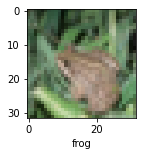

In [35]:
y_test = y_test.reshape(-1,)
plot_sample(X_test,y_test,4)

In [37]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[1.97155657e-03, 5.71754026e-05, 4.11561830e-03, 7.47925758e-01,
        6.81635749e-04, 2.38436177e-01, 3.24679539e-03, 2.50431156e-04,
        3.15630040e-03, 1.58560564e-04],
       [6.96831346e-02, 2.28529289e-01, 5.01479826e-06, 5.08321000e-06,
        1.71131933e-06, 5.72714725e-07, 2.01740306e-07, 2.40162148e-08,
        6.77963138e-01, 2.38118879e-02],
       [8.73022676e-02, 3.30947757e-01, 1.63741026e-03, 1.29146706e-02,
        1.42826512e-03, 2.35853321e-03, 4.68409038e-04, 6.11858151e-04,
        5.34492493e-01, 2.78383624e-02],
       [8.38596821e-01, 1.67791347e-03, 4.70494740e-02, 4.55129985e-03,
        2.01742407e-02, 5.61937595e-05, 1.04838495e-04, 9.10260351e-05,
        8.66892561e-02, 1.00897951e-03],
       [2.43964655e-06, 5.11246108e-05, 7.46563263e-03, 2.85551865e-02,
        2.56847888e-01, 7.67065585e-03, 6.99322641e-01, 5.03053598e-05,
        2.22997423e-05, 1.17568761e-05]], dtype=float32)

In [39]:
np.argmax([5,12,167,2])

2

In [40]:
np.argmax(y_pred[0])

3

In [41]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [43]:

y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

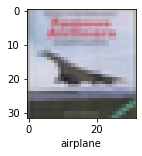

In [47]:
plot_sample(X_test,y_test,3)

In [49]:
classes[y_classes[3]]

'airplane'

In [52]:


print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.76      0.72      1000
           1       0.80      0.80      0.80      1000
           2       0.57      0.55      0.56      1000
           3       0.47      0.55      0.50      1000
           4       0.68      0.59      0.63      1000
           5       0.57      0.60      0.58      1000
           6       0.67      0.84      0.75      1000
           7       0.81      0.68      0.74      1000
           8       0.86      0.74      0.79      1000
           9       0.82      0.71      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

